## Final Project Submission

Please fill out:
* Student name: John Ofrecio 
* Student pace: Part-Time 
* Scheduled project review date/time: 
* Instructor name: Abhineet 
* Blog post URL:


# How did you pick the question(s) that you did?
* "why are these questions important from a business perspective?"
* "how did you decide on the data cleaning options you performed?"
* "why did you choose a given method or library?"
* "why did you select those visualizations and what did you learn from each of them?"
* "why did you pick those features as predictors?"
* "how would you interpret the results?"
* "how confident are you in the predictive quality of the results?"
* "what are some of the things that could cause the results to be wrong?"

In [88]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error


data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [89]:
data.info() #Better understanding to see metadata 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Analysis

* There are a total of 21,597 rows and 21 columns
* 3 Columns (waterfront, view, yr_renovated,) seems to have some data missing. 
* date, sqft_basement are objects instead of numbers 

In [90]:
data.isna().sum() #looking at how much missing data 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Dropping Columns
* I believe dropping Columns id and date are necessary to reduce the columns since these two variables does nothing to predict the actual prices of the houses  

In [91]:
data = data.drop(columns=['id', 'date']) 

In [92]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Summary 

1.) 3 Missing Values in the Data Set: 
      -Waterfront (not all houses have waterfront)
      -View
      -Year Renovated (not all houses have been renovated) 

Basic Assumption: These 3 data could specify selected houses that offer unique qualities which therefore could bump the prices of their respective houses.  They could also be outliers since they might not fall within the average range of house prices because of their unique characteristics 

2.) floors, waterfront, view, condition, grade, sqft_living15 have similar mean and median 

3.) The maximum number of bedrooms is 33 which suggests an outlier. 

3.) Zipcode, lat, and long are numerical values but could be used as a dummy variable because they are more categorical instead of numerical values. 



# Detecting and Dropping Outlier

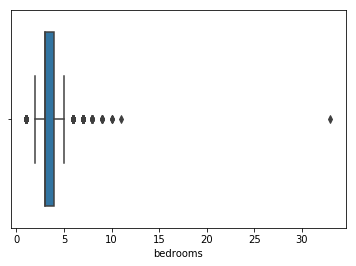

In [93]:
sns.boxplot(x=data['bedrooms']) #33 is way outside the normal range of central tendency 

In [94]:
data.loc[data["bedrooms"]>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [95]:
data['bedrooms'].replace(data.bedrooms>6,0,inplace=True) #don't know really how to remove the outliers so i replaced them instead. 

In [99]:
data.describe() #why is 33 still there? 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


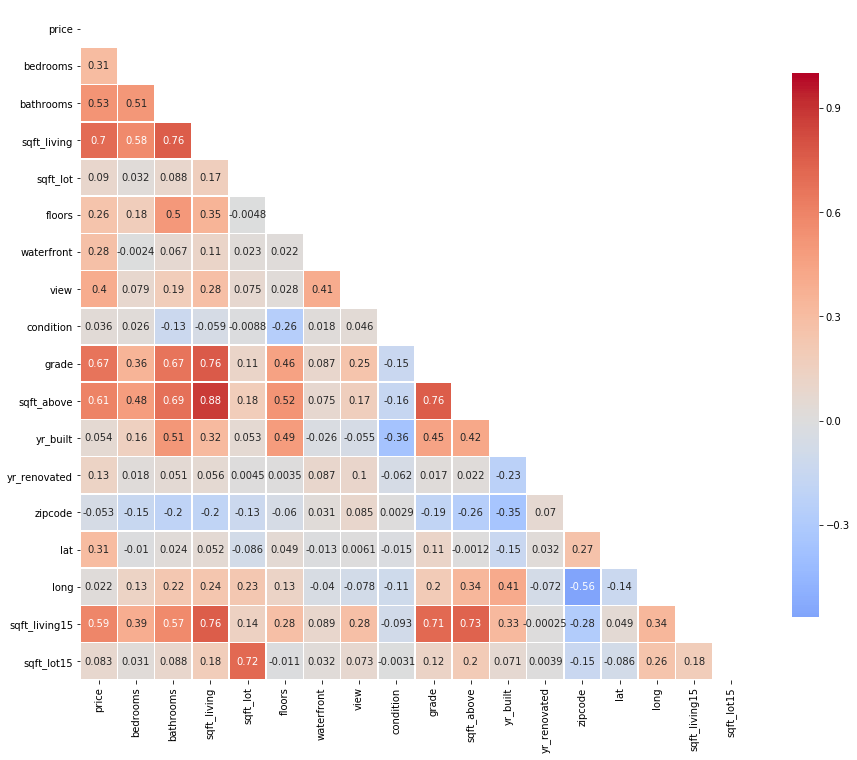

In [100]:
#initial correlation analysis 
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

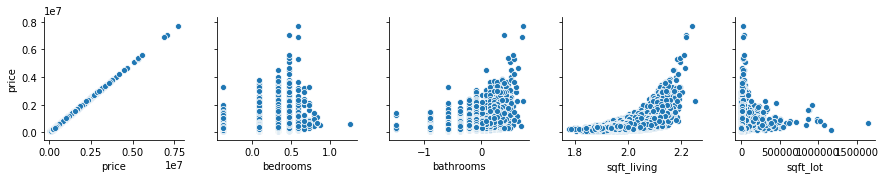

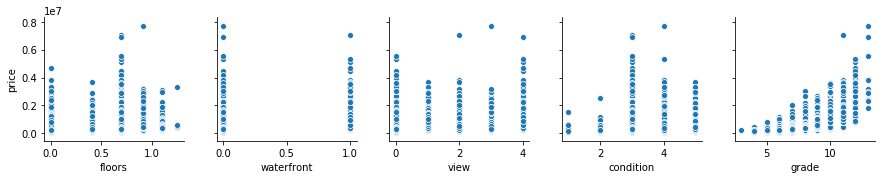

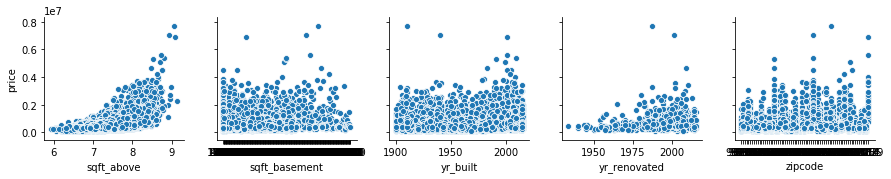

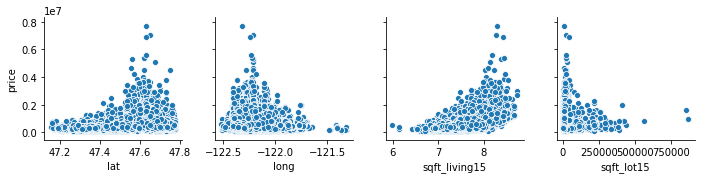

In [74]:
for i in range(0, len(data.columns), 5): #visualizing comparing characteristics to price 
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['price'])

# Hypothesis 

Bedrooms, sqft_living, sqft_above, and sqft_living15 are the variables that I am going to focus on to create a model to predict House prices within this Dataset

# Initial Analysis: 
* According to these graphs, bathrooms, sqft_living, sqft_above, and sqft_living15 show some linear progression compared to price. 

* These graphs also show some characteristics of categorical values.  In closer inspections, these variables are categorical values: 
   1. waterfront 
   2. view
   3. condition
   4. grade 

# Cleaning Data: Dealing with Categorical Values 
  
1.)  Set view to equal 0 if nobody has viewed the house 
2.)  Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
3.)  Change zipcode 
4.)  Change yr_renovated so that 0 = house that has not been renovated 



In [101]:
#1 
data['view'] = data['view'].fillna(0)

#2)
data['waterfront'] = data['waterfront'].fillna(0)

#3
data.zipcode = data.zipcode.astype(str)

#4
data['yr_renovated'] = data['yr_renovated'].replace(0,np.nan)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [102]:
data_pred= data.iloc[:,1:18] #Leave our Target Variable (Price)
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800


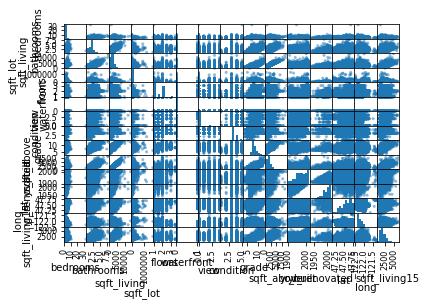

In [103]:
pd.plotting.scatter_matrix(data_pred); #diagonal 

In [104]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.156142,-0.009951,0.132054,0.393406
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.253306,0.024280,0.224903,0.569884
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.132791,0.052155,0.241214,0.756402
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.082031,-0.085514,0.230227,0.144763
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.059870,0.049239,0.125943,0.280102
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,-0.093519,-0.012157,-0.037628,0.083823
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,-0.059121,0.006321,-0.077702,0.278928
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.362244,-0.015102,-0.105877,-0.093072
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.447865,0.242323,0.113575,0.200341,0.713867
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,0.424037,0.052690,-0.001199,0.344842,0.731767


In [105]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False


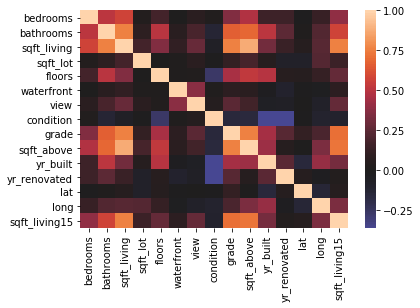

In [106]:
sns.heatmap(data_pred.corr(), center=0);

## SUMMARY 
No major multicollinearity since correlations do not fall betwen .75-.80 

# Variables to Use in our Prediction

**bedrooms**, **sqft_living**, **sqft_living15**, **sqft_above** are the best factors to consider in determining future house prices.  

# Log Transformation 

To Improve performance of linear Regression 

In [107]:
#Log Transformation 
from statsmodels.formula.api import ols

In [110]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_living15', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5716.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:05:35   Log-Likelihood:            -2.9959e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21592   BIC:                         5.992e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.758e+04   7501.422      3.676      0.000    1.29e+04    4.23e+04
bedrooms      -5.606e+04   2316.560    -24.202      0.000   -6.06e+04   -5.15e+04
sqft_living     308.8676      4.537     68.076      0.000     299.975     317.761
sqft_living15    68.6391      3.993     17.190      0.000      60.812      76.466
sqft_above      -43.0877      4.486     -9.605      0.000     -51.881     -34.295
==============================================================================
Omnibus:                    15091.862   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           609514.827
Skew:                           2.870   Prob(JB):                         0.00
Kurtosis:                      28.385   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

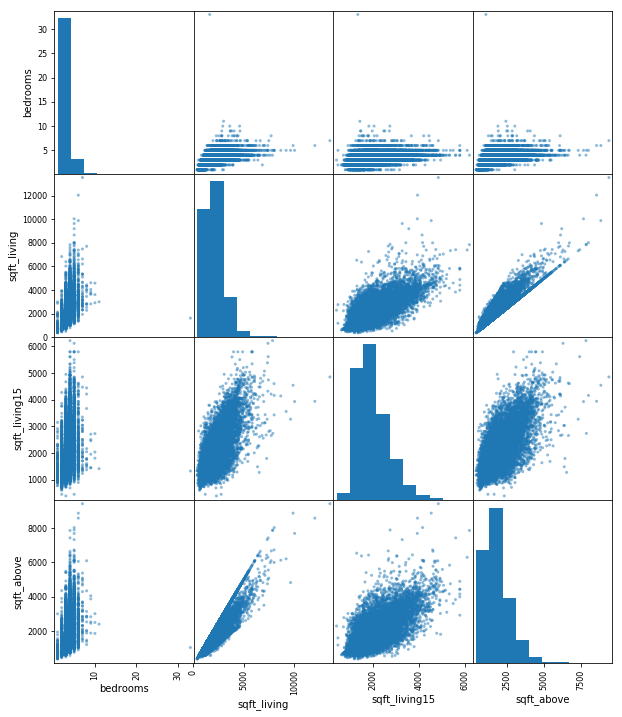

In [111]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

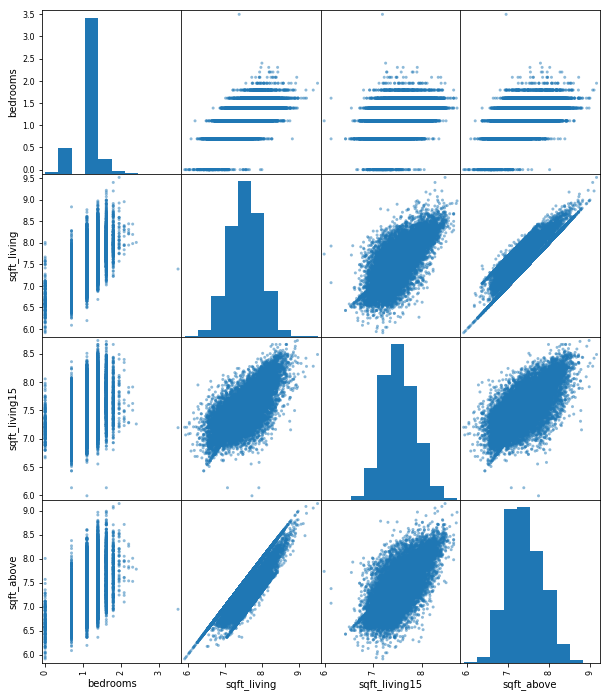

In [112]:
non_normal = ['bedrooms', 'sqft_living', 'sqft_living15', 'sqft_above']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [113]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_living15', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary() #why did the R-sqaured lower? 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3665.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:08:08   Log-Likelihood:            -3.0179e+05
No. Observations:               21597   AIC:                         6.036e+05
Df Residuals:                   21592   BIC:                         6.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -4.5e+06   4.72e+04    -95.421      0.000   -4.59e+06   -4.41e+06
bedrooms      -1.955e+05   9008.143    -21.707      0.000   -2.13e+05   -1.78e+05
sqft_living    5.016e+05   1.08e+04     46.538      0.000     4.8e+05    5.23e+05
sqft_living15  1.984e+05   9100.183     21.807      0.000    1.81e+05    2.16e+05
sqft_above    -1767.0073   9190.153     -0.192      0.848   -1.98e+04    1.62e+04
==============================================================================
Omnibus:                    19829.879   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1921686.726
Skew:                           4.086   Prob(JB):                         0.00
Kurtosis:                      48.483   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Scaling and Normalization 

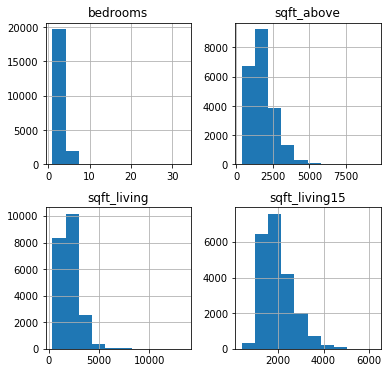

In [121]:
data_pred[["bedrooms", "sqft_living", "sqft_above", "sqft_living15"]].hist(figsize  = [6, 6]);

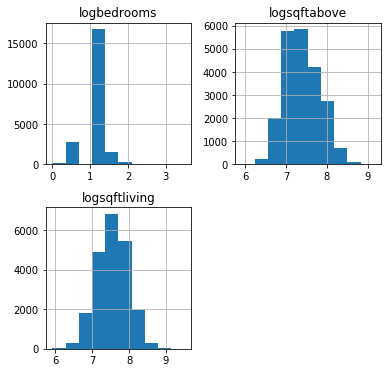

In [123]:
import numpy as np
data_log = pd.DataFrame([])
data_log["logbedrooms"] = np.log(data_pred["bedrooms"])
data_log["logsqftliving"] = np.log(data_pred["sqft_living"])
data_log["logsqftabove"] = np.log(data_pred["sqft_above"])
data_log.hist(figsize  = [6, 6]);

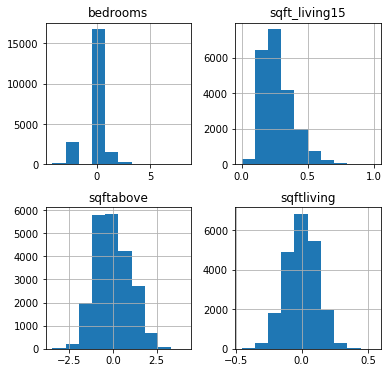

In [129]:
acc = data_pred["sqft_living15"]
logbedrooms = data_log["logbedrooms"]
logsqftliving = data_log["logsqftliving"]
logsqftabove = data_log["logsqftabove"]

scaled_sqft_living15 = (acc-min(acc))/(max(acc)-min(acc))	
scaled_bedrooms = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
scaled_sqftliving = (logsqftliving-np.mean(logsqftliving))/(max(logsqftliving)-min(logsqftliving))
scaled_sqftabove = (logsqftabove-np.mean(logsqftabove))/np.sqrt(np.var(logsqftabove))


data_cont_scaled = pd.DataFrame([])
data_cont_scaled["sqft_living15"]= scaled_sqftliving15
data_cont_scaled["bedrooms"]= scaled_bedrooms
data_cont_scaled["sqftabove"] = scaled_sqftabove
data_cont_scaled["sqftliving"] = scaled_sqftliving

data_cont_scaled.hist(figsize  = [6, 6]);

In [130]:
acc = data_pred["sqft_living15"]
logbedrooms = data_log["logbedrooms"]
logsqftliving = data_log["logsqftliving"]
logsqftabove = data_log["logsqftabove"]

scaled_sqft_living15 = (acc-min(acc))/(max(acc)-min(acc))	
scaled_bedrooms = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
scaled_sqftliving = (logsqftliving-np.mean(logsqftliving))/(max(logsqftliving)-min(logsqftliving))
scaled_sqftabove = (logsqftabove-np.mean(logsqftabove))/np.sqrt(np.var(logsqftabove))

data_fin = pd.DataFrame([])
data_fin["sqft_living15"]= scaled_sqft_living15
data_fin["bedrooms"]= scaled_bedrooms
data_fin["sqftliving"] = scaled_sqftliving
data_fin["sqftabove"] = scaled_sqftabove
con_dummies = pd.get_dummies(data["condition"], prefix="con")
grade_dummies = pd.get_dummies(data["grade"], prefix="gr")
price = data["price"]
data_fin = pd.concat([price, data_fin, con_dummies, grade_dummies,], axis=1)

In [131]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
price            21597 non-null float64
sqft_living15    21597 non-null float64
bedrooms         21597 non-null float64
sqftliving       21597 non-null float64
sqftabove        21597 non-null float64
con_1            21597 non-null uint8
con_2            21597 non-null uint8
con_3            21597 non-null uint8
con_4            21597 non-null uint8
con_5            21597 non-null uint8
gr_3             21597 non-null uint8
gr_4             21597 non-null uint8
gr_5             21597 non-null uint8
gr_6             21597 non-null uint8
gr_7             21597 non-null uint8
gr_8             21597 non-null uint8
gr_9             21597 non-null uint8
gr_10            21597 non-null uint8
gr_11            21597 non-null uint8
gr_12            21597 non-null uint8
gr_13            21597 non-null uint8
dtypes: float64(5), uint8(16)
memory usage: 1.2 MB


In [138]:
data_ols = pd.concat([price, scaled_bedrooms, scaled_sqft_living15, scaled_sqftliving, grade_dummies], axis= 1)
data_ols.head()

,price,logbedrooms,sqft_living15,logsqftliving,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,gr_10,gr_11,gr_12,gr_13
0,221900.0,-0.279725,0.161934,-0.132629,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,-0.279725,0.222165,0.083597,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,-1.711651,0.399415,-0.251210,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.736243,0.165376,0.008328,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.279725,0.241094,-0.034493,0,0,0,0,0,1,0,0,0,0,0


# Model 


In [139]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [140]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [141]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2125.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:24:35   Log-Likelihood:            -2.9849e+05
No. Observations:               21597   AIC:                         5.970e+05
Df Residuals:                   21583   BIC:                         5.971e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.485e+05   2.28e+04     37.262      0.000    8.04e+05    8.93e+05
logbedrooms   -2.044e+04   2245.257     -9.106      0.000   -2.48e+04    -1.6e+04
sqft_living15  2.147e+05    2.3e+04      9.315      0.000    1.69e+05     2.6e+05
logsqftliving  9.479e+05   2.86e+04     33.164      0.000    8.92e+05       1e+06
gr_3          -3.649e+05   2.23e+05     -1.633      0.102   -8.03e+05     7.3e+04
gr_4          -4.504e+05   4.83e+04     -9.316      0.000   -5.45e+05   -3.56e+05
gr_5          -4.744e+05   2.63e+04    -18.026      0.000   -5.26e+05   -4.23e+05
gr_6          -4.643e+05   2.25e+04    -20.643      0.000   -5.08e+05    -4.2e+05
gr_7          -4.527e+05   2.19e+04    -20.703      0.000   -4.96e+05    -4.1e+05
gr_8          -3.908e+05   2.18e+04    -17.906      0.000   -4.34e+05   -3.48e+05
gr_9          -2.482e+05   2.21e+04    -11.214      0.000   -2.92e+05   -2.05e+05
gr_10         -1.772e+04   2.29e+04     -0.775      0.438   -6.25e+04    2.71e+04
gr_11          3.358e+05   2.49e+04     13.503      0.000    2.87e+05    3.85e+05
gr_12          9.706e+05   3.27e+04     29.672      0.000    9.06e+05    1.03e+06
gr_13          2.405e+06   6.58e+04     36.546      0.000    2.28e+06    2.53e+06
==============================================================================
Omnibus:                    15633.554   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           814413.766
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      32.503   Cond. No.                     3.32e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [142]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2125.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:25:35   Log-Likelihood:            -2.9849e+05
No. Observations:               21597   AIC:                         5.970e+05
Df Residuals:                   21583   BIC:                         5.971e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.485e+05   2.28e+04     37.262      0.000    8.04e+05    8.93e+05
logbedrooms   -2.044e+04   2245.257     -9.106      0.000   -2.48e+04    -1.6e+04
sqft_living15  2.147e+05    2.3e+04      9.315      0.000    1.69e+05     2.6e+05
logsqftliving  9.479e+05   2.86e+04     33.164      0.000    8.92e+05       1e+06
gr_3          -3.649e+05   2.23e+05     -1.633      0.102   -8.03e+05     7.3e+04
gr_4          -4.504e+05   4.83e+04     -9.316      0.000   -5.45e+05   -3.56e+05
gr_5          -4.744e+05   2.63e+04    -18.026      0.000   -5.26e+05   -4.23e+05
gr_6          -4.643e+05   2.25e+04    -20.643      0.000   -5.08e+05    -4.2e+05
gr_7          -4.527e+05   2.19e+04    -20.703      0.000   -4.96e+05    -4.1e+05
gr_8          -3.908e+05   2.18e+04    -17.906      0.000   -4.34e+05   -3.48e+05
gr_9          -2.482e+05   2.21e+04    -11.214      0.000   -2.92e+05   -2.05e+05
gr_10         -1.772e+04   2.29e+04     -0.775      0.438   -6.25e+04    2.71e+04
gr_11          3.358e+05   2.49e+04     13.503      0.000    2.87e+05    3.85e+05
gr_12          9.706e+05   3.27e+04     29.672      0.000    9.06e+05    1.03e+06
gr_13          2.405e+06   6.58e+04     36.546      0.000    2.28e+06    2.53e+06
==============================================================================
Omnibus:                    15633.554   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           814413.766
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      32.503   Cond. No.                     3.32e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conclusion: 
Using the predictors of **bedrooms**,  **sqft_living**, **sqft_above**, **sqft_living15** shows that it is not enough to predict house prices since the R-squared is less than the optimum .80 (.56)